In [17]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

In [18]:
# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

In [19]:
# Load digits dataset, where each example is a flattened 8x8 image of a digit.
X, y = load_digits(return_X_y=True)

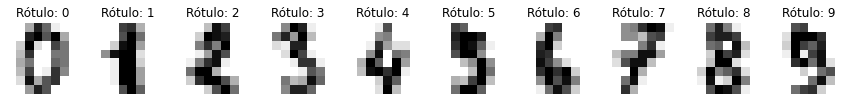

In [20]:
# Display the first 10 digits.
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Rótulo: {label}')

In [21]:
# Split the data set.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Multinomial (Softmax)

In [22]:
# Instantiate LogisticRegression object.
# max_iter: Maximum number of iterations taken for the solvers to converge.
# multi_class is set to multinomial so that the object performs Softmax regression.
model = LogisticRegression(max_iter=10000,
                           multi_class='multinomial', 
                           solver='lbfgs', 
                           random_state=seed)

In [23]:
# Train model.
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [24]:
# Predict.
y_pred = model.predict(x_test)

In [25]:
print("Accuracy of Logistic Regression model is: %1.2f %%" % (accuracy_score(y_test, y_pred)*100))

Accuracy of Logistic Regression model is: 97.22 %


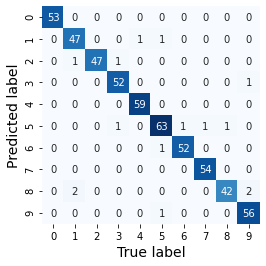

In [28]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(0,10), yticklabels=range(0,10), cmap="Blues")
plt.xlabel('True label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
# Save figure.
#plt.savefig("confusion_matrix_digit_classification_softmax.png", dpi=600)
plt.show()